### **Introduction**
  This dataset contains medical observation of a patients, To describe a few they are : Age, Height, Weight, Systolic blood pressure, Diastolic blood pressure, Cholesterol, Alcohol intake, Physical activity, etc.

The objectives of this analysis is to explore the relationship between cardiac disease, body measurements, blood markers, lifestyle choices and visualization. 



---



**Importing LIbraries!**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Getting Data!**

In [ ]:
med_df = pd.read_csv('medical_examination.csv')

**The data at a glance!**

In [ ]:
med_df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
med_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
med_df["id"].nunique()

70000

**Dataset Overview :**

This data has 13 coloumns and 70,000 rows.
- Numeric variables: 6
- Categorical variables in numeric representation: 7
- unique patients: 70,000

**Variables Overview :**
- Age values are given in days.
- ap_hi represent Systolic blood pressure	and ap_lo represent Diastolic blood pressure.	 
- Cholesterol and Glucose values are 1 - normal, 2 - above normal, 3 - well above normal
- Smoking, Alcohol intake, Physical activity, Presence or absence of cardiovascular disease	variable values are in binary. 0 for 'good' and 1 for'bad'.
- Other variable values are in normal form.







---

### **Data cleaning and wrangling!**

Converting Age value from days to years :

In [ ]:
med_df["age"] = med_df["age"]/365
med_df["age"] = med_df["age"].apply(np.int64) 

Adding overweight coloumn and values are overweight as 1 and underweight as 0 using BMI :

In [ ]:
BMI = med_df["weight"]/((med_df["height"]/100)**2)
med_df['overweight'] = BMI.apply(lambda x : 1 if x>25 else 0)

In [ ]:
med_df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,0


To normalize data changing cholesterol and gluc values to 0 for 'good' and 1 for 'bad'. If the current value of variable is 1 then changing it to 0 and if it is more then 1 then to 1.

In [ ]:
med_df['cholesterol']=med_df['cholesterol'].apply(lambda x : 0 if x==1 else 1)
med_df['gluc']=med_df['gluc'].apply(lambda x : 0 if x==1 else 1)

In [ ]:
med_df[["weight", "overweight"]].head()

,weight,overweight
0,62.0,0
1,85.0,1
2,64.0,0
3,82.0,1
4,56.0,0


systolic pressure is higher than diastolic so removing incorrect values of it.

In [ ]:
med_df = med_df[med_df['ap_lo'] <= med_df['ap_hi']]

Using box plot to see value distribution and statistics

age          AxesSubplot(0.125,0.536818;0.227941x0.343182)
height    AxesSubplot(0.398529,0.536818;0.227941x0.343182)
weight    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
ap_hi           AxesSubplot(0.125,0.125;0.227941x0.343182)
ap_lo        AxesSubplot(0.398529,0.125;0.227941x0.343182)
dtype: object

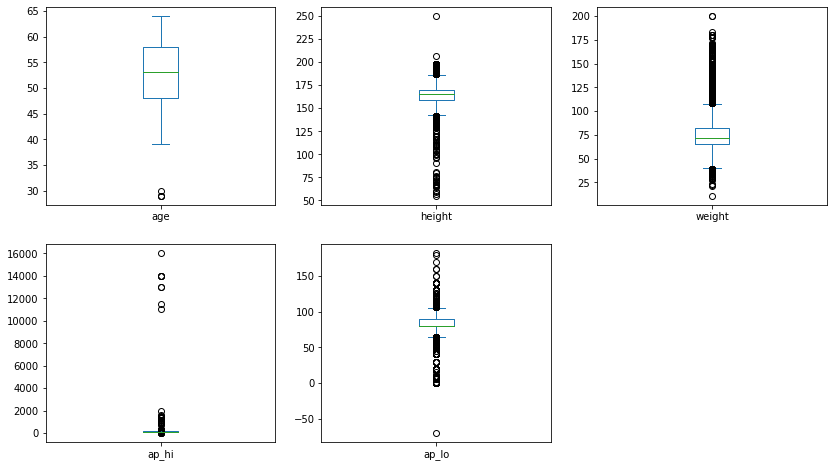

In [ ]:
boxplot_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

med_df[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

statistical measures :

In [ ]:
med_df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']].describe()

,age,height,weight,ap_hi,ap_lo
count,68766.0,68766.000000,68766.000000,68766.000000,68766.000000
mean,0.0,164.359916,74.114962,128.839601,81.245776
std,0.0,8.190703,14.332163,155.201462,9.694132
min,0.0,55.000000,11.000000,12.000000,-70.000000
25%,0.0,159.000000,65.000000,120.000000,80.000000
50%,0.0,165.000000,72.000000,120.000000,80.000000
75%,0.0,170.000000,82.000000,140.000000,90.000000
max,0.0,250.000000,200.000000,16020.000000,182.000000


---

### **Getting insight and visualizing data!**

To identify relationship between various variables we first need to measure the correlation between variable. There are various statistical methods are available to find it. I will use pearson correlation coefficients for continuous variables and Point Biserial Correlation to calculate relationship between mix variables.

Removing the values that are lesser than 2.5th percentile and higher than 97.5th percentile in the value distributation of height and weight variables for staying more close to center of the distributation.  

In [ ]:
df_heat = med_df[ 
              (med_df['ap_lo'] <= med_df['ap_hi']) &
              (med_df['height'] >= med_df['height'].quantile(0.025)) & 
              (med_df['height'] <= med_df['height'].quantile(0.975)) &
              (med_df['weight'] >= med_df['weight'].quantile(0.025)) &
              (med_df['weight'] <= med_df['weight'].quantile(0.975))]


In [ ]:
corr_matrix = df_heat.corr()
mask = np.triu(corr_matrix)
corr_matrix

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002988,0.003212,0.000136,0.000252,0.003519,0.000655,0.003926,0.002382,-0.002705,-0.000639,0.005900,0.003803,-0.000654
age,0.002988,1.000000,-0.018422,-0.077270,0.069777,0.018731,0.153149,0.129646,0.086796,-0.044298,-0.027029,-0.011723,0.240169,0.089468
sex,0.003212,-0.018422,1.000000,0.505238,0.131196,0.005051,0.060012,-0.037421,-0.021265,0.337225,0.168700,0.007885,0.002258,-0.053043
height,0.000136,-0.077270,0.505238,1.000000,0.252420,0.004538,0.017381,-0.063550,-0.030592,0.187275,0.089346,-0.005465,-0.024432,-0.150320
weight,0.000252,0.069777,0.131196,0.252420,1.000000,0.026948,0.226556,0.133958,0.105316,0.055412,0.059122,-0.013663,0.169397,0.657410
ap_hi,0.003519,0.018731,0.005051,0.004538,0.026948,1.000000,0.072648,0.022750,0.011052,-0.001968,0.000715,-0.000194,0.050544,0.017252
ap_lo,0.000655,0.153149,0.060012,0.017381,0.226556,0.072648,1.000000,0.149742,0.074274,0.023128,0.032726,0.001882,0.327148,0.171604
cholesterol,0.003926,0.129646,-0.037421,-0.063550,0.133958,0.022750,0.149742,1.000000,0.383653,0.012489,0.038120,0.002807,0.203327,0.127362
gluc,0.002382,0.086796,-0.021265,-0.030592,0.105316,0.011052,0.074274,0.383653,1.000000,-0.004466,0.013801,-0.010000,0.088761,0.087562
smoke,-0.002705,-0.044298,0.337225,0.187275,0.055412,-0.001968,0.023128,0.012489,-0.004466,1.000000,0.340980,0.027168,-0.020740,-0.003747


Plotting Heat Map :

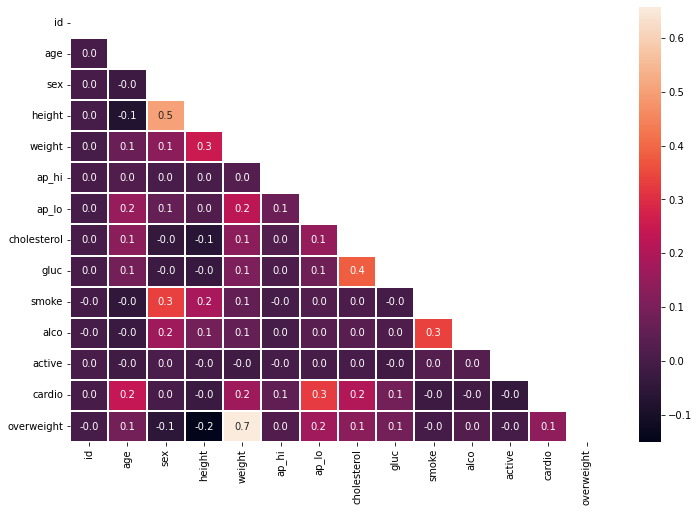

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr_matrix, annot = True, fmt=".1f" ,linewidths=1, mask=mask)


> - As we can see in the above figure the values inside intersecting squares represents pearson correlation coefficients of their respective variable. 







In [ ]:
corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,NaN,NaN,1.000000,0.505238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,NaN,NaN,0.505238,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.65741
ap_hi,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ap_lo,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cholesterol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
gluc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
smoke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN




> As we can see above no important variable has positive or negative moderate or strong relationship with each other.





In [ ]:
corr_matrix[(corr_matrix > 0.1) | (corr_matrix < -0.1)]

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,1.000000,NaN,NaN,NaN,NaN,0.153149,0.129646,NaN,NaN,NaN,NaN,0.240169,NaN
sex,NaN,NaN,1.000000,0.505238,0.131196,NaN,NaN,NaN,NaN,0.337225,0.16870,NaN,NaN,NaN
height,NaN,NaN,0.505238,1.000000,0.252420,NaN,NaN,NaN,NaN,0.187275,NaN,NaN,NaN,-0.150320
weight,NaN,NaN,0.131196,0.252420,1.000000,NaN,0.226556,0.133958,0.105316,NaN,NaN,NaN,0.169397,0.657410
ap_hi,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ap_lo,NaN,0.153149,NaN,NaN,0.226556,NaN,1.000000,0.149742,NaN,NaN,NaN,NaN,0.327148,0.171604
cholesterol,NaN,0.129646,NaN,NaN,0.133958,NaN,0.149742,1.000000,0.383653,NaN,NaN,NaN,0.203327,0.127362
gluc,NaN,NaN,NaN,NaN,0.105316,NaN,NaN,0.383653,1.000000,NaN,NaN,NaN,NaN,NaN
smoke,NaN,NaN,0.337225,0.187275,NaN,NaN,NaN,NaN,NaN,1.000000,0.34098,NaN,NaN,NaN


Insights :

> So according to matrix, There are weak positive relationship between few variables. LIke correlation between Cardio and age, ap_lo(Diastolic blood pressure	), cholesterol are 0.2, 0.3 and 0.2 respectively. Correlation between weight and ap_lo is 0.2.


> So according to data we can say that increase in age, Diastolic blood pressure and weight has weak but positive relationship	with cardiovascular disease.







---



Creating  catplot to see data's various features in relation to who has cardiovascular disease and not.

In [ ]:
df_cat = pd.melt(med_df, id_vars=["cardio"], value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

In [ ]:
df_cat["total"] = 0
df_cat = df_cat.groupby(["cardio", "variable", "value"]).count().reset_index()

In [ ]:
df_cat.head()

,cardio,variable,value,total
0,0,active,0,6318
1,0,active,1,28425
2,0,alco,0,32823
3,0,alco,1,1920
4,0,cholesterol,0,29113


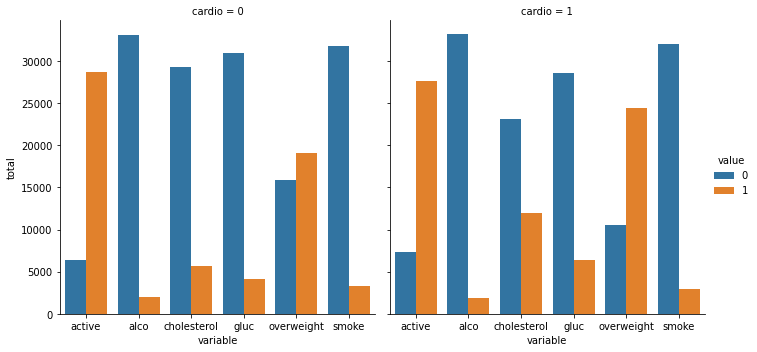

In [ ]:
fig = sns.catplot(data = df_cat, x="variable", y="total", kind="bar", col = "cardio", hue="value").fig

Insights :

(Remember 0 is good and 1 is bad)
1. So from the right side of the plot which shows cardiovascular disease petients it is observable that they are high in cholesterol, overweight and less physically active than other side of petients.
2. while on the left side which shows petients who doesn't have cardiovascular disease are less in negative habits.








---



Adding Age range coloumn for different age range and creating catplot to see categirical value distribution. 

In [ ]:
age_df = med_df.copy()

In [ ]:
med_df[med_df["age"] <30]["id"].count()

3

As we can see there are not enough data for the people whose age is less than 30. So i will create two age range mid age and senior

In [146]:
age_df["age_group"] = med_df["age"].apply(lambda x : "mid_age" if (x >= 30 and x<=59 ) else "senior")

In [147]:
age_df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight,age_group
0,0,50,2,168,62.0,110,80,0,0,0,0,1,0,0,mid_age
1,1,55,1,156,85.0,140,90,1,0,0,0,1,1,1,mid_age
2,2,51,1,165,64.0,130,70,1,0,0,0,0,1,0,mid_age
3,3,48,2,169,82.0,150,100,0,0,0,0,1,1,1,mid_age
4,4,47,1,156,56.0,100,60,0,0,0,0,0,0,0,mid_age


Unpivoting Columns :

In [148]:
age_cat = pd.melt(age_df, id_vars=["age_group"], value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'cardio', 'active', 'overweight'])

In [149]:
age_cat["total"] = 0
age_cat = age_cat.groupby(["age_group", "variable", "value"]).count().reset_index()

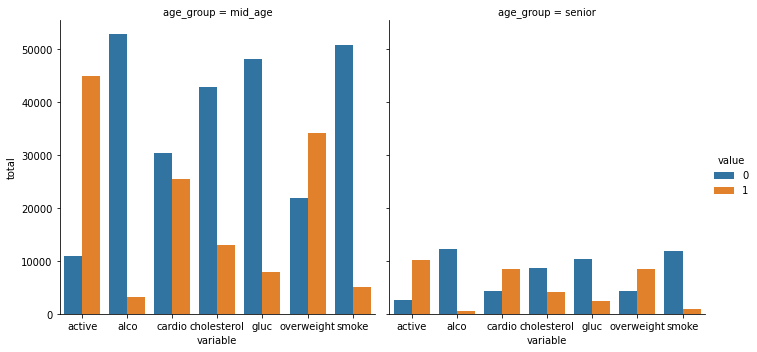

In [152]:
fig = sns.catplot(data = age_cat, x="variable", y="total", kind="bar", col = "age_group", hue="value").fig

Insights :

(Remember 0 is good and 1 is bad)
1. So from the fig we can say that in the dataset mid age group are high in overweight and almost half have cardiovascular disease. 
2. More than 75% of the middel age petipatientent are physically less active. 
3. However in the senior group more patient has cardiovascular disease. 
4. More then 60% of the patient of Both groups are overweight.


### **conclusion :**
Insights from data :
- We can derive that patient who has cardiovascular disease  are high in cholesterol, overweight and less physically active. so there can be corelationship between this. And it is intuitive.
- With increase in age data shows chances of getting cardiovascular disease increase.
- But this data is insufficient.
- More parameters are needed to explore the relationship between cardiac disease, body measurements, blood markers, lifestyle choices.   
